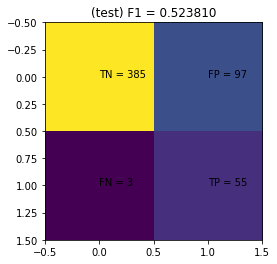

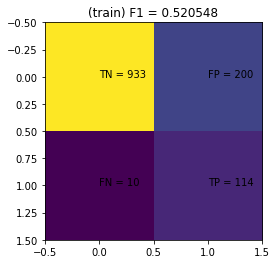

In [25]:
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)
data = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.7)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

numero = 1

clasificador_train = y_train==numero
cov = np.cov(((x_train[clasificador_train]-np.mean(x_train[clasificador_train], axis = 0))/(np.std(x_train[clasificador_train], axis = 0)+0.001)).T)
valores, vectores = np.linalg.eig(cov)
valores = np.real(valores)
vectores = np.real(vectores)
ii = np.argsort(-abs(valores))
valores = valores[ii]
vectores = vectores[:,ii]

n_vectores = 5
x_train_PCA =  x_train @ vectores[:,:n_vectores]
x_test_PCA =   x_test @ vectores[:,:n_vectores]

clasificador_test = y_test==numero

magnitud_train = np.linalg.norm(x_train_PCA, axis = 1)
magnitud_test = np.linalg.norm(x_test_PCA, axis = 1)

clasificador = np.percentile(magnitud_train, 75) 


def prediccion(dd, clasificador, nombre): 
    cm = confusion_matrix(dd, clasificador)   
    F1 = f1_score(dd, clasificador)
    plt.figure()
    plt.imshow(cm)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.title('(%s) F1 = %f'%(nombre, F1))
    plt.savefig('matriz_confusion_%s.png'%nombre)
            
prediccion(clasificador_test, magnitud_test>clasificador, 'test')
prediccion(clasificador_train, magnitud_train>clasificador, 'train')

F1
0.5793103448275861


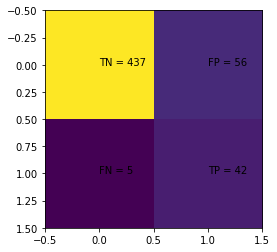